In [ ]:
data = '/content/bodyfat.csv'

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv(data)
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Menghitung statistik deskriptif
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


<Axes: >

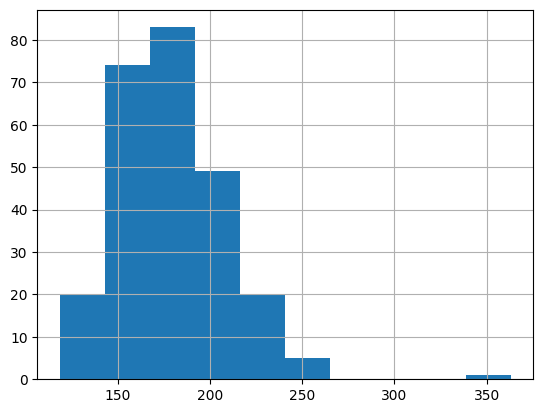

In [ ]:
# Visualisasi Histogram
df['Weight'].hist()

<Axes: >

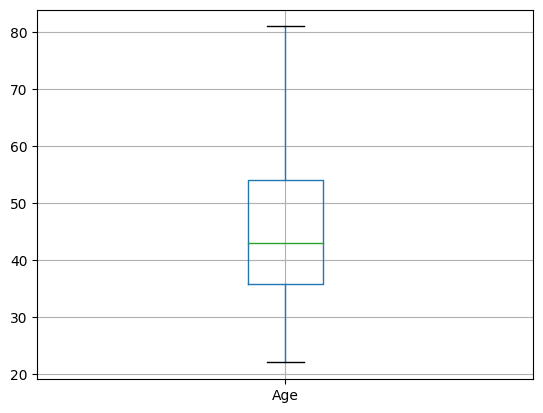

In [ ]:
# Visualisasi Box Plot
df.boxplot(column='Age')

<Axes: xlabel='Weight', ylabel='Height'>

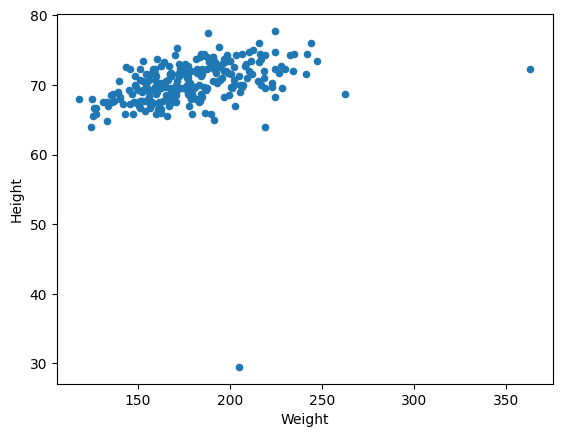

In [ ]:
# Visualisasi Scatter Plot
df.plot.scatter(x='Weight', y='Height')

<Axes: >

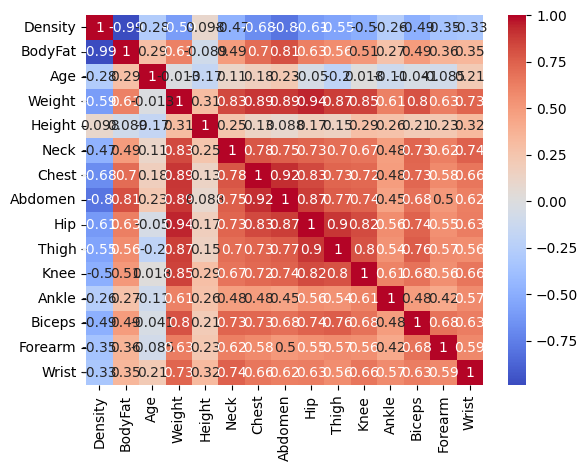

In [ ]:
# Menghitung dan memvisualisasikan matriks korelasi
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
# Mengidentifikasi Missing Values
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

<Axes: xlabel='Age'>

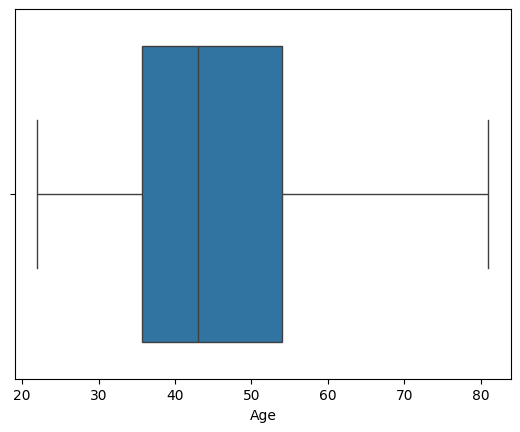

In [ ]:
# Mendeteksi Outliers:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Age'>

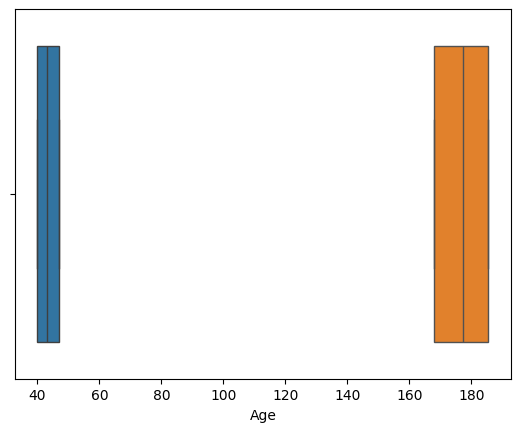

In [ ]:
#Data Cleaning

# Mengidentifikasi Nilai yang Hilang:
missing_values = df.isnull().sum()

# Menangani Nilai yang Hilang:
# Opsi 1: Hapus baris dengan nilai yang hilang:
df.dropna(inplace=True)

# Opsi 2: Mengisi nilai yang hilang:
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Mendeteksi Outliers:
outliers = df[((df['Age'] < df['Age'].quantile(0.25)) | (df['Age'] > df['Age'].quantile(0.75))) & ((df['Weight'] < df['Weight'].quantile(0.25)) | (df['Weight'] > df['Weight'].quantile(0.75)))]

# Menangani Outliers:
# Opsi 1: Hapus outliers:
df = df.drop(outliers.index)

# Opsi 2: Mengisi outliers:
df['Age'] = df['Age'].clip(lower=df['Age'].quantile(0.25), upper=df['Age'].quantile(0.75))
df['Weight'] = df['Weight'].clip(lower=df['Weight'].quantile(0.25), upper=df['Weight'].quantile(0.75))

# Memverifikasi Pembersihan Data:
df.describe()
df.isnull().sum()
sns.boxplot(x=df['Age'])
sns.boxplot(x=df['Weight'])


In [ ]:
# Menampilkan jumlah baris duplikat
df.duplicated().sum()

# Menghapus duplikat
df.drop_duplicates(inplace=True)